In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as mt


In [ ]:
data = pd.read_csv('C:/Users/TUNCER/Desktop/Polynomial_Regression/home.csv')
veri = data.copy()
print(veri.info())

In [2]:
veri.drop(columns=["No","X1 transaction date","X5 latitude","X6 longitude"],axis = 1,inplace = True )
print(veri)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  Y house price of unit area  
0                                 10                        37.9  
1                                  9                        42.2  
2                                  5                        47.3  

In [8]:
veri = veri.rename(columns={"X2 house age":"Ev Yaşı",
                           "X3 distance to the nearest MRT station":"Metro uzaklık",
                           "X4 number of convenience stores":"Market Sayısı",
                            "Y house price of unit area":"Ev Fiyatı"})
print(veri.isnull().sum())

Ev Yaşı          0
Metro uzaklık    0
Market Sayısı    0
Ev Fiyatı        0
dtype: int64


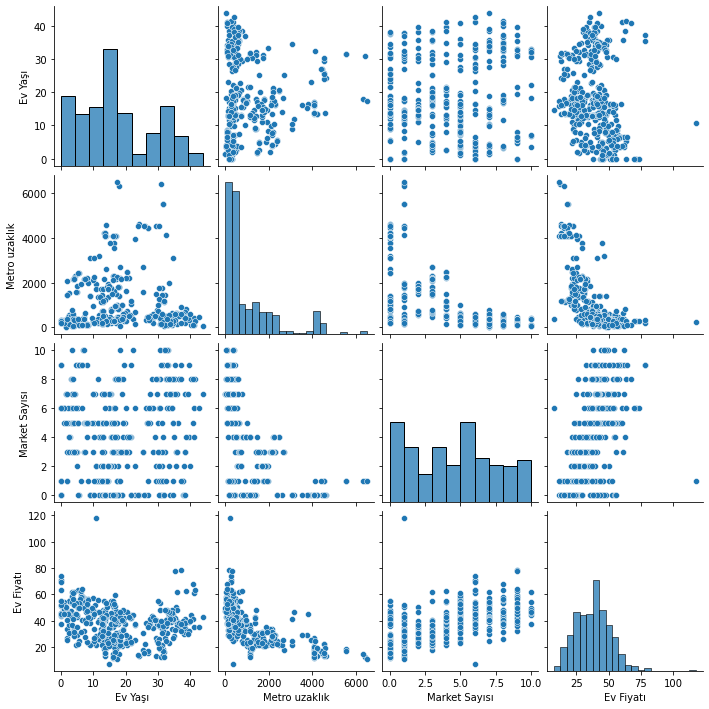

In [9]:
sns.pairplot(veri)
plt.show()

In [15]:
y = veri["Ev Fiyatı"]
X = veri.drop(columns="Ev Fiyatı",axis = 1)


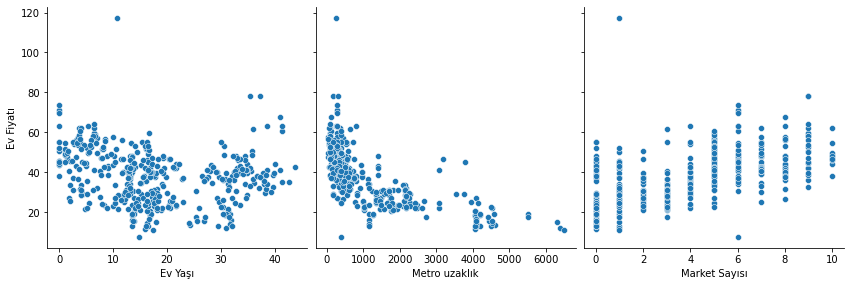

In [29]:
sns.pairplot(veri, x_vars=['Ev Yaşı', 'Metro uzaklık', 'Market Sayısı'], y_vars='Ev Fiyatı', height=4, aspect=1, kind='scatter')
plt.show()


In [22]:
pol = PolynomialFeatures(degree=3)
X_pol = pol.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_pol,y,test_size=0.2,random_state=42)

In [25]:
pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)
tahmin = pol_reg.predict(X_test)

In [26]:
r2 = mt.r2_score(y_test,tahmin)
Mse = mt.mean_squared_error(y_test,tahmin)

print("R2: {} MSE: {}".format(r2,Mse))

R2: 0.7273210770298024 MSE: 45.7445464535372


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pol_reg, X_pol, y, cv=10, scoring='r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.69087015 0.79151886 0.57489867 0.59383436 0.7703131  0.5824018
 0.31839537 0.57468029 0.53410688 0.70740205]
Average cross-validation score: 0.61
